In [2]:
import pandas as pd
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [6]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [7]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [57]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_predict = model.predict(X_test)

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=4)
scores

array([0.74439462, 0.82511211, 0.82959641, 0.81531532])

In [60]:
model.score(X_test, y_predict)

1.0

In [61]:
model.score(X_train, y_train)

0.877665544332211

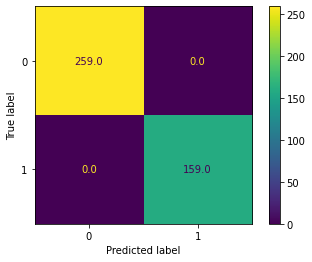

In [68]:
from sklearn.metrics import plot_confusion_matrix
pcm = plot_confusion_matrix(model, X_test, y_predict, values_format='.1f')

In [63]:
X_test.shape

(418, 3)